Insurance Forcast by using Linear Regression

In [27]:
import tensorflow as tf
print(tf.__version__) 

2.8.0


In [28]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [29]:
# Read in the insurance dataset
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [30]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [31]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [33]:
# Preprocessing data (normalization and standardization)
from sklearn.compose import make_column_transformer 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y values(features and labels)
x = df.drop("charges", axis=1)
y = df["charges"]

# Create training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2, 
                                                    random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(x_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)

x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [34]:
# Build neural network
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
df_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
df_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
df_model.fit(x_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13345.8545 - mae: 13345.8545
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13344.9365 - mae: 13344.9365
Epoch 3/100
34/34 [==============================] - 0s 906us/step - loss: 13343.0898 - mae: 13343.0898
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13338.1357 - mae: 13338.1357
Epoch 5/100
34/34 [==============================] - 0s 979us/step - loss: 13323.4707 - mae: 13323.4707
Epoch 6/100
34/34 [==============================] - 0s 918us/step - loss: 13278.4209 - mae: 13278.4209
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 13138.7305 - mae: 13138.7305
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 12704.0049 - mae: 12704.0049
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 11480.4248 - mae: 11480.4248
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 96

In [36]:
# Evaluate our larger model
df_model.evaluate(x_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3168.0410 - mae: 3168.0410


[3168.041015625, 3168.041015625]

In [38]:
from logging import logProcesses
# Build neural network
# set random seed
tf.random.set_seed(42)

# 1.Creat a model
df_model_2 = tf.keras.Sequential([
                                  
   tf.keras.layers.Dense(100), # 100 units                        
   tf.keras.layers.Dense(10),   # 10 units
   tf.keras.layers.Dense(1)                           
])

# 2. Compile the model
df_model_2.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["mae"]
                 )

# 3.Fit the model
history = df_model_2.fit(x_train_normal, y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 11925.96

In [39]:
# Evaluate our larger model
df_model_2.evaluate(x_test_normal,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3171.5774 - mae: 3171.5774


[3171.577392578125, 3171.577392578125]

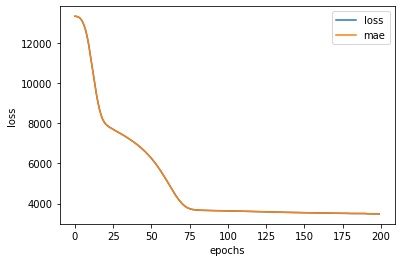

In [40]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");